In [1]:
# Load necessary packages
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image

Using TensorFlow backend.


In [2]:
# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

 12705792/170498071 [=>............................] - ETA: 2:29

KeyboardInterrupt: 

In [3]:
# Lets determine the dataset characteristics
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [4]:
# Now for a single image 
print(X_train[0].shape)

(32, 32, 3)


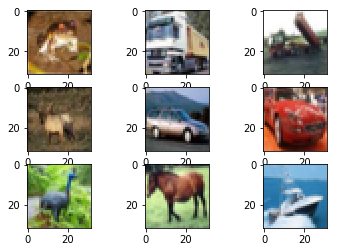

In [5]:
# create a grid of 3x3 images
for i in range(0,9):
    plt.subplot(330 + 1 + i)
    img = X_train[i]
    plt.imshow(img)
    
# show the plot
plt.show()

In [ ]:
# Building a convolutional neural network for object recognition on CIFAR-10

# fix random seed for reproducibility
seed = 6
np.random.seed(seed) 

# load the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize the inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0


In [7]:
# class labels shape
print(y_train.shape)
print(y_train[0])

(50000, 1)
[6]


The class labels are a single integer value (0-9).  What we really want is a one-hot vector of length ten.  For example, the class label of 6 should be denoted [0, 0, 0, 0, 0, 0, 1, 0, 0, 0].  We can accomplish this using the np_utils.to_categorical() function.

In [8]:
# hot encode outputs
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)
num_classes = Y_test.shape[1]

print(Y_train.shape)
print(Y_train[0])

(50000, 10)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


### 3. Building the All-CNN

Using the paper as a reference, we can implement the All-CNN network in Keras.  Keras models are built by simply adding layers, one after another. 

To make things easier for us later, we will wrap this model in a function, which will allow us to quickly and neatly generate the model later on in the project. 

In [ ]:
# start building the model - import necessary layers
from keras.models import Sequential
from keras.layers import Dropout, Activation, Conv2D, GlobalAveragePooling2D,MaxPooling2D,BatchNormalization
from keras.optimizers import Adam,SGD

def allcnn(weights=None):
    # define model type - Sequential
    model = Sequential()

    # add model layers - Convolution2D, Activation, Dropout
    
    model.add(Conv2D(96, (3, 3), padding = 'same', input_shape=(32, 32, 3)))
    model.add(Activation('relu'))
    
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='valid'))    

    model.add(Conv2D(384, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))            
    
    model.add(Conv2D(384, (3, 3), padding = 'same'))
    model.add(Activation('relu'))        
    model.add(Dropout(0.5))    
    
    model.add(MaxPooling2D(pool_size=(3,3),strides=2,padding='valid'))    

    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(192, (3, 3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Dropout(0.3))    
    
    model.add(Conv2D(196, (1, 1), padding = 'valid'))
    model.add(Activation('relu'))
    
    model.add(Conv2D(10, (1, 1), padding = 'valid'))
    
    # add GlobalAveragePooling2D layer with Softmax activation
    model.add(GlobalAveragePooling2D())
    model.add(Activation('softmax'))
    
    # load the weights
    if weights:
        model.load_weights(weights)
    
    # return model
    return model


In [10]:
# define hyper parameters
learning_rate = 0.0001
weight_decay = 1e-6
momentum = 0.9

# build model 
model = allcnn()

# define optimizer and compile model
opt = Adam(lr=learning_rate, decay=weight_decay)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# print model summary
print (model.summary())

# define additional training parameters
epochs = 350
batch_size = 128

# fit the model
#model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=epochs, batch_size=batch_size, verbose = 1)


import keras
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
  featurewise_center=False,  # set input mean to 0 over the dataset
  samplewise_center=False,  # set each sample mean to 0
  featurewise_std_normalization=False,  # divide inputs by std of the dataset
  samplewise_std_normalization=False,  # divide each input by its std
  zca_whitening=False,  # apply ZCA whitening
  rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
  width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
  height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
  horizontal_flip=True,  # randomly flip images
  vertical_flip=False)  # randomly flip images
  # Compute quantities required for feature-wise normalization
  # (std, mean, and principal components if ZCA whitening is applied).
# define hyper parameters

datagen.fit(X_train)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graph2', histogram_freq=0, write_graph=True, write_images=True)
  # Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(X_train,Y_train,
                                 batch_size=batch_size),
                                 epochs=epochs,
                                 steps_per_epoch=X_train.shape[0] // batch_size,
                                 validation_data=(X_test, Y_test))

W0618 11:42:20.041222 140647138858880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 11:42:20.061308 140647138858880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0618 11:42:20.064757 140647138858880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0618 11:42:20.103978 140647138858880 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0618 11:42:20.119505 140647138858880 deprecation_wrapp

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 96)        2688      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 192)       166080    
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 192)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 192)       331968    
_________________________________________________________________
activation_3 (Activation)    (None, 32, 32, 192)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 192)       0         
__________

W0618 11:42:21.911538 140647138858880 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/350
390/390 [==============================] - 55s 141ms/step - loss: 1.8731 - acc: 0.2866 - val_loss: 1.7740 - val_acc: 0.3339
Epoch 2/350
390/390 [==============================] - 52s 133ms/step - loss: 1.5828 - acc: 0.4103 - val_loss: 1.5789 - val_acc: 0.4228
Epoch 3/350
390/390 [==============================] - 51s 130ms/step - loss: 1.4144 - acc: 0.4825 - val_loss: 1.4019 - val_acc: 0.5269
Epoch 4/350
390/390 [==============================] - 51s 131ms/step - loss: 1.3017 - acc: 0.5277 - val_loss: 1.2706 - val_acc: 0.5559
Epoch 5/350
390/390 [==============================] - 51s 132ms/step - loss: 1.2117 - acc: 0.5603 - val_loss: 1.1844 - val_acc: 0.5972
Epoch 6/350
390/390 [==============================] - 52s 132ms/step - loss: 1.1382 - acc: 0.5927 - val_loss: 1.1410 - val_acc: 0.6087
Epoch 7/350
390/390 [==============================] - 52s 133ms/step - loss: 1.0878 - acc: 0.6125 - val_loss: 1.1020 - val_acc: 0.6346
Epoch 8/350
390/390 [===========================

In [11]:
from google.colab import files
model.save('OB_model.hdf5')
files.download("OB_model.hdf5")

# test the model with pretrained weights
scores = model.evaluate(X_test, Y_test, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

10000/10000 [==============================] - 4s 373us/step
Accuracy: 91.15%


In [12]:
# make dictionary of class labels and names
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

9/9 [==============================] - 0s 47ms/step


In [14]:
# print our predictions
print (predictions)

[[3.93625209e-13 3.46522832e-12 8.94434693e-10 4.87455319e-11
  9.99693155e-01 9.28499091e-08 3.04357900e-10 3.06701462e-04
  2.60178944e-12 1.90612825e-13]
 [4.90807972e-09 7.54042802e-08 2.67873122e-03 4.68079420e-03
  3.88900787e-02 9.49760199e-01 3.47073865e-03 4.09394823e-04
  1.02369981e-04 7.61665615e-06]
 [5.01397172e-15 2.78191248e-10 3.00008374e-08 2.37743956e-11
  5.78160159e-11 8.05011879e-09 1.00000000e+00 6.66196699e-13
  9.35142328e-12 1.76932947e-11]
 [1.34515243e-09 3.28330607e-09 2.18276085e-07 9.99730408e-01
  7.57437668e-09 7.40535953e-08 2.69302400e-04 3.47433726e-09
  1.87775559e-10 4.98530177e-08]
 [1.37524163e-24 1.00000000e+00 4.23066774e-30 2.03500340e-25
  3.87897619e-31 2.78563857e-26 3.87778339e-28 8.74285528e-28
  1.15668950e-21 7.80733644e-10]
 [1.18932158e-20 1.00000000e+00 1.97023226e-20 7.04771427e-19
  1.64016274e-25 5.24364603e-22 5.58630500e-22 6.69520857e-26
  8.31408604e-21 9.76648682e-16]
 [9.41546077e-08 1.43114562e-10 5.21691472e-05 9.97593820e

In [15]:
# these are individual class probabilities, should sum to 1.0 (100%)
for image in predictions:
    print(np.sum(image))

1.0
1.0
1.0
1.0
1.0
1.0
0.99999994
1.0
1.0


In [17]:
# use np.argmax() to convert class probabilities to class labels
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[4 5 6 3 1 1 3 6 8]


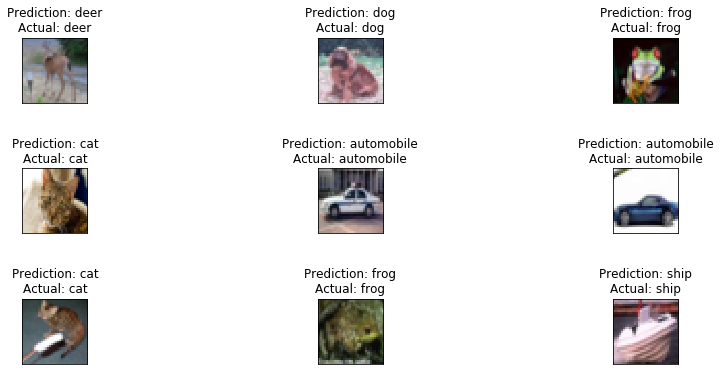

In [19]:
# create a grid of 3x3 images
fig, axs = plt.subplots(3, 3, figsize = (15, 6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):

    # determine label for each prediction, set title
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()